In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
m1 = pd.read_excel ("C://Users/crudek/1.DataMgmt/supermarket_sales.xlsx")
m1.head()

,invoice,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
m1['dummy'] = 1

In [17]:
m1['month'] = sales['date'].dt.month

In [67]:
f1 = m1['branch'].value_counts().rename_axis('branch').reset_index(name='counts')

,branch,counts
0,A,340
1,B,332
2,C,328


In [24]:
s1 = m1.groupby("branch").agg(
    {
        "quantity": "sum",
        "sales": "sum",
        "unit_price": "mean",
        "gross_income": "mean",
    }
)

In [100]:
s1

,quantity,sales,unit_price,gross_income
branch,,,,
A,1859,106200.3705,54.780853,14.874001
B,1820,106197.6720,55.659277,15.232024
C,1831,110568.7065,56.609024,16.052367


In [30]:
!pip install sqlite3
import sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [32]:
#Creating a SQLite Database / Import SQLite (You only run this once) - It is empty container now.
#import sqlite3
db_conn = sqlite3.connect("C://Users/crudek/1.DataMgmt/st_DB.db")

In [68]:
m1.to_sql("m1_DB", db_conn, if_exists="replace")
f1.to_sql("f1_DB", db_conn, if_exists="replace")
s1.to_sql("s1_DB", db_conn, if_exists="replace")

3

In [43]:
#Establish a cursor object, which is a tool that executes SQL code against the database
my_cur = db_conn.cursor()

In [44]:
#Know the list of tables in the database
my_cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(my_cur.fetchall())

[('m1_DB',), ('f1_DB',), ('s1_DB',)]


In [37]:
#close connection:
db_conn.close()

In [41]:
#reconnect
db_conn = sqlite3.connect("C://Users/crudek/1.DataMgmt/st_DB.db")
my_cur = db_conn.cursor()

In [45]:
pd.read_sql_query("SELECT * from m1_DB LIMIT 5", db_conn )

,index,invoice,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_pct,gross_income,rating,dummy,month
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08:00.000000,Ewallet,522.83,4.761905,26.1415,9.1,1,1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,10:29:00.000000,Cash,76.40,4.761905,3.8200,9.6,1,3
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00.000000,Credit card,324.31,4.761905,16.2155,7.4,1,3
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33:00.000000,Ewallet,465.76,4.761905,23.2880,8.4,1,1
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37:00.000000,Ewallet,604.17,4.761905,30.2085,5.3,1,2


In [69]:
pd.read_sql_query("SELECT * from f1_DB LIMIT 5", db_conn )

,index,branch,counts
0,0,A,340
1,1,B,332
2,2,C,328


In [71]:
pd.read_sql_query("SELECT * from s1_DB LIMIT 5", db_conn )

,branch,quantity,sales,unit_price,gross_income
0,A,1859,106200.3705,54.780853,14.874001
1,B,1820,106197.6720,55.659277,15.232024
2,C,1831,110568.7065,56.609024,16.052367


In [50]:
#p2.1
#all records where brach != c
q1 = pd.read_sql_query("SELECT * from m1_DB WHERE branch <> 'C'", db_conn )

,index,invoice,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_pct,gross_income,rating,dummy,month
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08:00.000000,Ewallet,522.83,4.761905,26.1415,9.1,1,1
1,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00.000000,Credit card,324.31,4.761905,16.2155,7.4,1,3
2,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33:00.000000,Ewallet,465.76,4.761905,23.2880,8.4,1,1
3,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37:00.000000,Ewallet,604.17,4.761905,30.2085,5.3,1,2
4,6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25 00:00:00,14:36:00.000000,Ewallet,413.04,4.761905,20.6520,5.8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22 00:00:00,18:35:00.000000,Ewallet,174.90,4.761905,8.7450,6.6,1,2
668,996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02 00:00:00,17:16:00.000000,Ewallet,973.80,4.761905,48.6900,4.4,1,3
669,997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09 00:00:00,13:22:00.000000,Cash,31.84,4.761905,1.5920,7.7,1,2
670,998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22 00:00:00,15:33:00.000000,Cash,65.82,4.761905,3.2910,4.1,1,2


In [79]:
#p2.2
pd.read_sql_query("SELECT a.branch, a.quantity, a.sales, a.unit_price, a.gross_income, \
                  b.counts, avg(a.quantity) as 'avg_qty', avg(a.sales) as 'avg_sales' \
                  from s1_DB a left join f1_DB b on a.branch = b.branch group by a.branch", db_conn )

,branch,quantity,sales,unit_price,gross_income,counts,avg_qty,avg_sales
0,A,1859,106200.3705,54.780853,14.874001,340,1859.0,106200.3705
1,B,1820,106197.6720,55.659277,15.232024,332,1820.0,106197.6720
2,C,1831,110568.7065,56.609024,16.052367,328,1831.0,110568.7065


In [81]:
#p2.3
pd.read_sql_query("SELECT product_line, avg(unit_price) as 'avg_price' from m1_DB \
                  group by product_line", db_conn )

,product_line,avg_price
0,Electronic accessories,53.551588
1,Fashion accessories,57.153652
2,Food and beverages,56.008851
3,Health and beauty,54.854474
4,Home and lifestyle,55.316937
5,Sports and travel,56.993253


In [84]:
#p2.4
me1 = pd.read_sql_query("SELECT city, gender, sum(gross_income) as 'sum_gross_income' from m1_DB \
                  group by city, gender", db_conn )

,city,gender,sum_gross_income
0,Mandalay,Female,2520.3950
1,Mandalay,Male,2536.6370
2,Naypyitaw,Female,2937.4030
3,Naypyitaw,Male,2327.7735
4,Yangon,Female,2536.6270
5,Yangon,Male,2520.5335


In [90]:
#p2.4
me1_piv = me1.pivot_table(index="city",columns="gender",values="sum_gross_income",aggfunc="sum")
me1_piv

gender,Female,Male
city,,
Mandalay,2520.395,2536.6370
Naypyitaw,2937.403,2327.7735
Yangon,2536.627,2520.5335


In [95]:
#p2.5
pd.read_sql_query("SELECT a.branch, b.unit_price/a.unit_price as 'price_index_branch' \
                  from s1_DB a join m1_DB b on a.branch = b.branch \
                  group by a.branch", db_conn )

,branch,price_index_branch
0,A,0.184006
1,B,0.190265
2,C,0.179477


In [99]:
#p2.6
pd.read_sql_query("SELECT sum(counts), sum(quantity), avg(quantity), max(quantity), min(quantity) \
                  FROM m1_DB a join f1_DB b on a.branch = b.branch", db_conn )

,sum(counts),sum(quantity),avg(quantity),max(quantity),min(quantity)
0,333408,5510,5.51,10,1


In [114]:
#p2.7
q7 = pd.read_sql_query("select invoice, city, gender, quantity, unit_price and sales from m1_DB \
                  where branch = 'B' AND quantity = 4 AND payment in ('Ewallet', 'Cash') AND \
                  product_line in ('Electronic accessories', 'Fashion accessories') AND month in (2,3)", db_conn)

In [115]:
#p2.7
q7.shape

(10, 5)

In [128]:
#p2.8
pd.read_sql_query("select city, (sum(quantity)*1.0/ (select sum(quantity) from m1_db)) \
                  as 'test' from m1_db group by city", db_conn)

,city,test
0,Mandalay,0.330309
1,Naypyitaw,0.332305
2,Yangon,0.337387


In [130]:
#p2.9
pd.read_sql_query("select distinct branch, city, customer_type, gender, product_line from m1_db", db_conn).shape

(72, 5)

In [155]:
#p2.10
q10 = pd.read_sql_query("select branch, city, gender, sum(gross_income) from m1_db group by branch, city, gender \
                  order by sum(gross_income) desc", db_conn)
q10

,branch,city,gender,sum(gross_income)
0,C,Naypyitaw,Female,2937.4030
1,B,Mandalay,Male,2536.6370
2,A,Yangon,Female,2536.6270
3,A,Yangon,Male,2520.5335
4,B,Mandalay,Female,2520.3950
5,C,Naypyitaw,Male,2327.7735


In [145]:
q10.head(1)

,branch,city,gender,sum(gross_income)
0,C,Naypyitaw,Female,2937.403


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

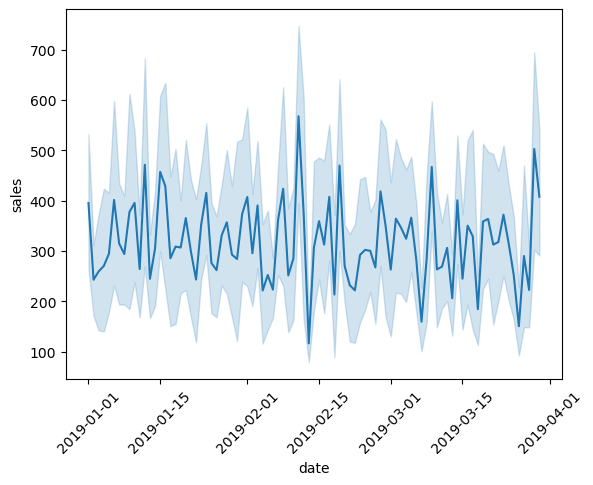

In [158]:
sns.lineplot(data=m1, x="date", y="sales")
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='gross_income', ylabel='quantity'>

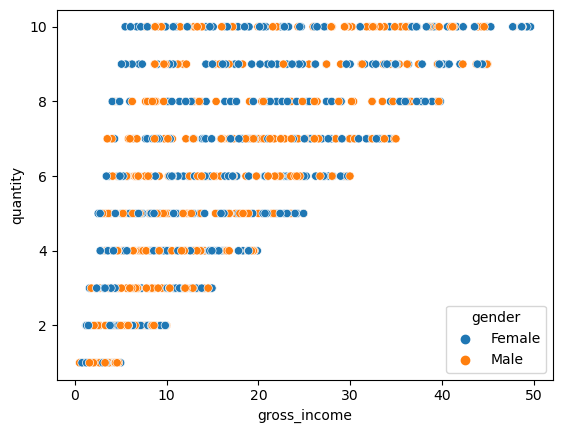

In [154]:
sns.scatterplot(data = m1, x="gross_income", y="quantity", hue="gender")